<a href="https://colab.research.google.com/github/vis-hal-k/Data_science_self-Practice/blob/main/Coursera_course/%23C1-IntroToTensorFlow%26ML-AI-DL/Week-4_MATERIAL/HosrseHumanWithValidation_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ImageDataGenerator with a Validation Set
In this lab, you will continue using the `ImageDataGenerator` class to prepare the `Hosrse or humans~ dataset. this time, you will add a validation set so you also measure how well the model performs on data it has'nt seen.

Run the code blocks below to download the datasets `horse-or-human.zip` and `validation-horse-or-human.zip` respectively.

In [ ]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-06-29 20:21:22--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.128, 172.253.123.128, 74.125.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   122MB/s    in 1.2s    

2023-06-29 20:21:23 (122 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]

--2023-06-29 20:21:23--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.128, 172.253.123.128, 74.125.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480

In [ ]:
import tensorflow as tf
from tensorflow import keras

TRAIN SET HORSES ['horse35-5.png', 'horse03-9.png', 'horse16-8.png', 'horse21-3.png', 'horse50-5.png', 'horse19-9.png', 'horse05-1.png', 'horse16-4.png', 'horse21-0.png', 'horse16-6.png']
TRAIN SET HUMANS ['human17-04.png', 'human01-09.png', 'human13-00.png', 'human11-24.png', 'human16-00.png', 'human12-18.png', 'human02-08.png', 'human04-12.png', 'human08-23.png', 'human06-30.png']
TRAIN SET HORSES ['horse35-5.png', 'horse03-9.png', 'horse16-8.png', 'horse21-3.png', 'horse50-5.png', 'horse19-9.png', 'horse05-1.png', 'horse16-4.png', 'horse21-0.png', 'horse16-6.png']
TRAIN SET HUMANS ['human17-04.png', 'human01-09.png', 'human13-00.png', 'human11-24.png', 'human16-00.png', 'human12-18.png', 'human02-08.png', 'human04-12.png', 'human08-23.png', 'human06-30.png']

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


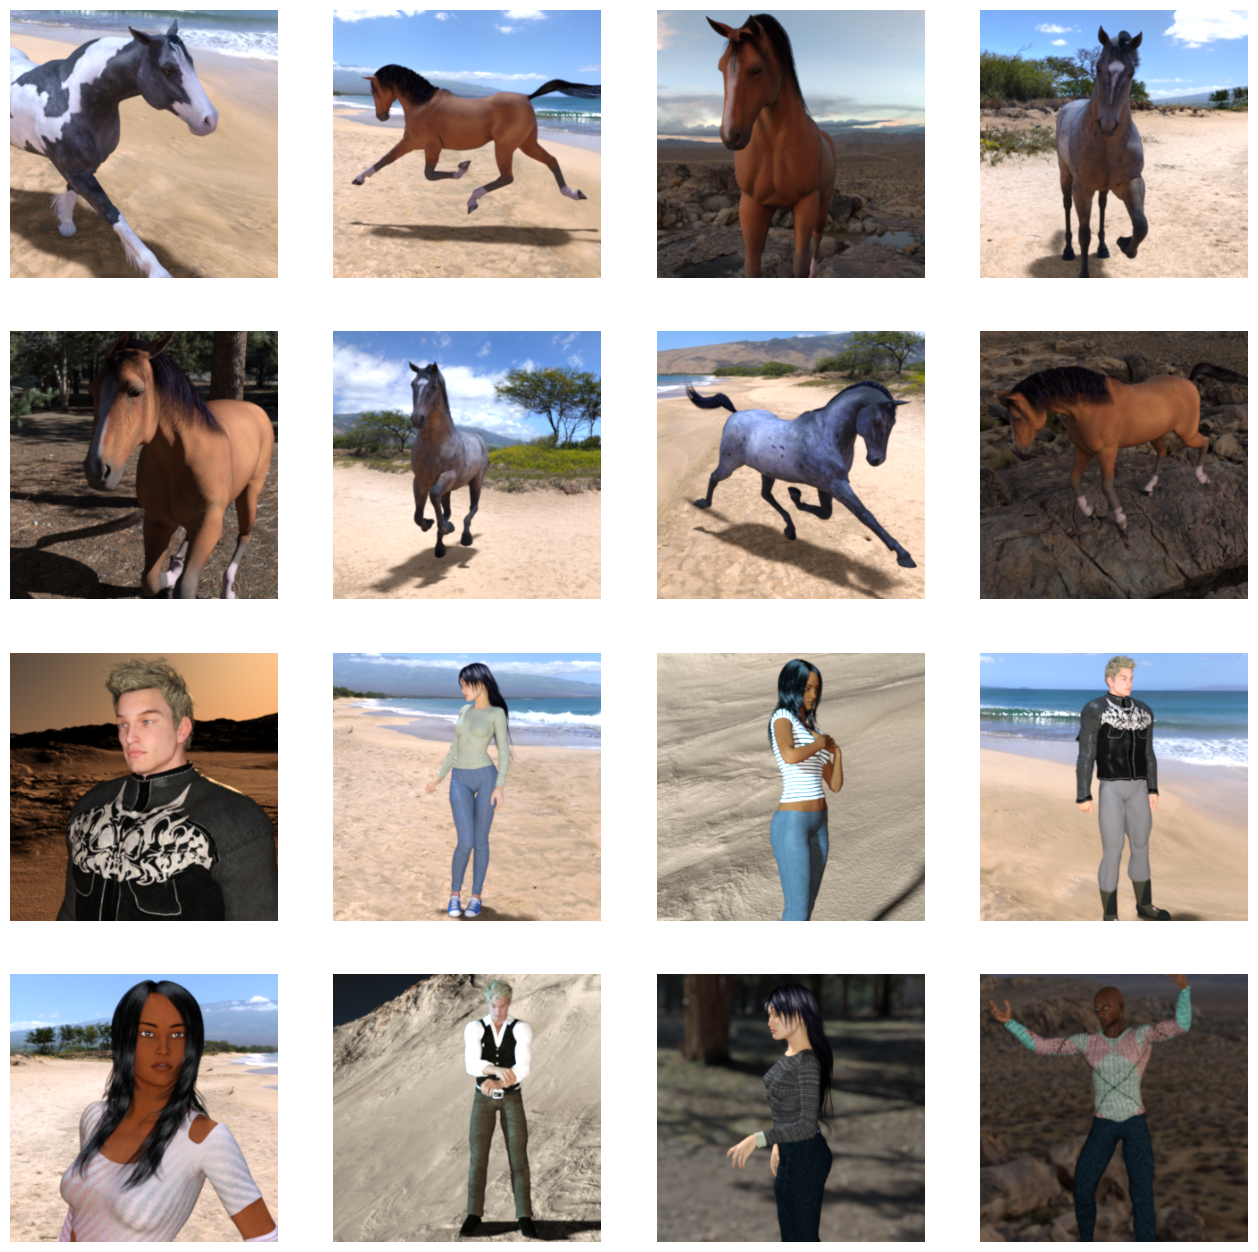

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 35, 35, 64)      

TypeError: ignored

In [ ]:
# Unzip the both training set and validation set
import zipfile
local_zip = "/content/horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip , 'r')
zip_ref.extractall('/content/horse-or-human')

local_zip = "/content/validation-horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip , 'r')
zip_ref.extractall('/content/validation-horse-or-human')
zip_ref.close()
#
#
#
# We will define the directories containing your images. This time, you will include those with validation data.

import os
# dir with training horses and humans
train_horse_dir = os.path.join("/content/horse-or-human/horses")
train_human_dir = os.path.join("/content/horse-or-human/humans")
# dir with validation horses and humans
validation_horse_dir = os.path.join("/content/validation-horse-or-human/horses")
validation_human_dir = os.path.join("/content/validation-horse-or-human/humans")
#
#
#
# Now see what the filenames look like in these directories:

# for training horse and human
train_horse_names = os.listdir(train_horse_dir)
print("TRAIN SET HORSES", train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print("TRAIN SET HUMANS", train_human_names[:10])
# for Validation horse and human
validation_horse_names = os.listdir(validation_horse_dir)
print("TRAIN SET HORSES", train_horse_names[:10])
validation_human_names = os.listdir(validation_human_dir)
print("TRAIN SET HUMANS", train_human_names[:10])
#
#
#
# You can find out the total number of horse and human images in the directories:

print(f'/ntotal training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')
#
#
#
# Now take a look at a few pictures to get a better sense of what they look like. First, configure the matplotlib parameters:

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
# Index for iterating over images
pic_index = 0
# Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

#
#
# BUILDING A SMALL MODEL FORM SCRATCH
# You will defien the same model acechitecture as before:

import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])
print(model.summary())
#
#
#
# Now we will use the COMPILE setting
# from keras.optimizers import RMSprop
# model.compile(loss = 'binary_crossentropy',
#               optimizer = RMSprop(learning_rate = 0.001)
#               metrics = ['accuracy']
#               )